## Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
from function_data_processing import *
from function_ML import *



pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Load data

In [2]:
data1 = pd.read_csv('/Users/yuriawano/fetal_health_classification/data/fetal_health_modeling.csv')
data1

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
0,71.611347,-1.833548,-3.904537,-1.363542,-1.677820,37.264136,-1.698371,7.49855,-0.229605,15.008226,1.339407,0.752864,53149.942412,4.672702,B
1,77.866926,-1.833548,-3.904537,-1.363542,-1.694483,10.777798,-1.698371,7.49855,-0.229605,22.632791,1.339612,2.228554,53149.942412,2.610067,A
2,78.384675,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,22.632791,1.339612,1.956520,53149.942412,2.698445,A
3,78.901899,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,3.221597,53149.942412,2.698445,A
4,77.866926,-1.833548,-3.904537,-1.363542,-1.677820,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,2.877034,53149.942412,2.514309,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,81.994480,-1.833548,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,11.309256,1.339612,1.639072,53149.942412,0.702658,B
2109,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.122632,B
2110,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,15.420003,1.339612,1.956520,53149.942412,1.424686,B
2111,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.424686,B


## Scaling the imbalanced data: Upsampling

In [3]:
data1['fetal_health'].value_counts()

A    1646
B     292
C     175
Name: fetal_health, dtype: int64

In [4]:
A = data1[data1['fetal_health'] == 'A'].sample(1600) # needs the replace because it has less than 400 rows
B = data1[data1['fetal_health'] == 'B'].sample(1600, replace=True)
C = data1[data1['fetal_health'] == 'C'].sample(1600, replace=True)

upsample_df = pd.concat([A, B, C]).sample(frac=1) # .sample(frac=1) here is just to shuffle the dataframe


In [5]:
upsample_df.shape

(4800, 15)

In [6]:
upsample_df['fetal_health'].value_counts()

C    1600
B    1600
A    1600
Name: fetal_health, dtype: int64

## Train the model

In [7]:
X_up = upsample_df.drop('fetal_health', axis = 1)
y_up = upsample_df['fetal_health']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.2, random_state=42)

### Scaling the numericals and save the transformation file

In [9]:
transformer = StandardScaler().fit(X_train)
x_standardized = transformer.transform(X_train)
# saving in a pickle
#with open('X_train_transformer.pickle', 'wb') as file:
 #   pickle.dump(transformer, file)
    
# loading from a pickle  
#with open('X_train_transformer.pickle', 'rb') as file:
 #   loaded_transformer = pickle.load(file)

#X_train = loaded_transformer.transform(X_train)


In [10]:
transformer = StandardScaler().fit(X_test)
x_standardized = transformer.transform(X_test)

In [11]:
X_train.shape, X_test.shape

((3840, 14), (960, 14))

## Model evaluation of upsampling metrix
Here we will test on Logistic Regression, KNN and Random Forest

### Logistic regression

In [12]:
def model_comparison(X, y, K_value):
    
    print('Comparison 1. Logistic regression')
    # Logistic regression: accuracy score
    classification = LogisticRegression(random_state=42, max_iter=10000)
    classification.fit(X, y)
    
    print('1) Logistic regression score:', classification.score(X_test, y_test))
    
    # Confusion metrix
    print('2) Confustion metrix:')
    predictions = classification.predict(X_test)
    print(confusion_matrix(y_test, predictions))
    
    # Plot confusion metrix
    print('3) Confustion metrix plot: see bottom plot')
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True A', 'False A', 'False A',
               'False B', 'True B', 'False B',
               'False C', 'False C', 'True C']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    print(sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues'))
    
    print('4) Classification report:')
    print(classification_report(y_test, classification.predict(X_test)))
    
    
    print('Comparison 2. KNN Classifier')
    model = KNeighborsClassifier(n_neighbors= K_value)
    model.fit(X, y)
    
    print('1) KNN Classifier accuracy score:')
    y_pred = model.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))
    
    print('2) Confusion metrix:')
    predictions_knn = model.predict(X_test)
    confusion_matrix(y_test, predictions_knn)
    
    
    print('3) Classification report') 
    print(classification_report(y_test, model.predict(X_test)))
    
    print('3) Comparison 3. Decision Tree')
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    
    
    


Comparison 1. Logistic regression
1) Logistic regression score: 0.6625
2) Confustion metrix:
[[219  50  40]
 [ 34 213  76]
 [ 31  93 204]]
3) Confustion metrix plot: see bottom plot
AxesSubplot(0.125,0.125;0.62x0.755)
4) Classification report:
              precision    recall  f1-score   support

           A       0.77      0.71      0.74       309
           B       0.60      0.66      0.63       323
           C       0.64      0.62      0.63       328

    accuracy                           0.66       960
   macro avg       0.67      0.66      0.67       960
weighted avg       0.67      0.66      0.66       960

Comparison 2. KNN Classifier
1) KNN Classifier accuracy score:
0.903125
2) Confusion metrix:
3) Classification report
              precision    recall  f1-score   support

           A       0.93      0.81      0.87       309
           B       0.87      0.90      0.88       323
           C       0.92      0.99      0.95       328

    accuracy                           

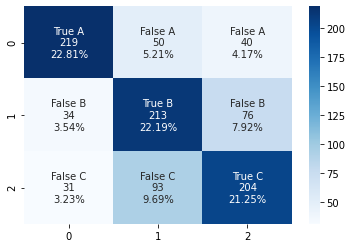

In [13]:
model_comparison(X_up, y_up, 15)

### KNN-Algorithm

#### Hyperparatemer: find the perfect K value

In [14]:
scores = []
for i in range(1,20,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_up, y_up)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.9989583333333333,
 0.984375,
 0.96875,
 0.9552083333333333,
 0.9333333333333333,
 0.9166666666666666,
 0.9041666666666667,
 0.903125,
 0.8895833333333333,
 0.8895833333333333]

Text(0, 0.5, 'Accuracy')

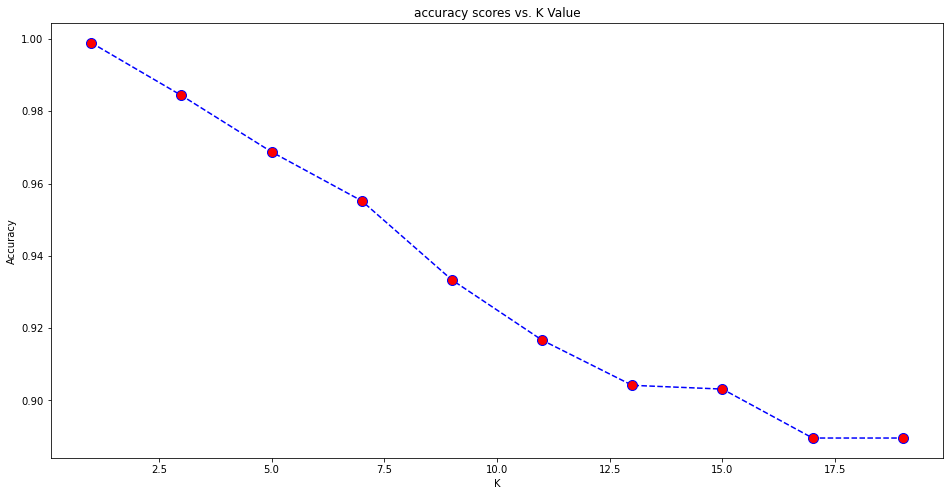

In [15]:
plt.figure(figsize=(16,8))
plt.plot(range(1,20,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [16]:
def model_knn_classifier(X, y, K_value):
    model = KNeighborsClassifier(n_neighbors= K_value)
    model.fit(X, y)
    
    print('1) KNN Classifier accuracy score:')
    y_pred = model.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))
    
    print('2) Confusion metrix:')
    predictions_knn = model.predict(X_test)
    confusion_matrix(y_test, predictions_knn)
    
    
    print('3) Classification report') 
    print(classification_report(y_test, model.predict(X_test)))

### Apply into KNN model
Use funtion from .py file

In [17]:
model_knn_classifier(X_up, y_up, 15)

1) KNN Classifier accuracy score:
0.903125
2) Confusion metrix:
3) Classification report
              precision    recall  f1-score   support

           A       0.93      0.81      0.87       309
           B       0.87      0.90      0.88       323
           C       0.92      0.99      0.95       328

    accuracy                           0.90       960
   macro avg       0.90      0.90      0.90       960
weighted avg       0.90      0.90      0.90       960



### Decision Tree

In [18]:
def model_decision_tree():
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    

In [19]:
model = DecisionTreeClassifier()


In [20]:
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [21]:
model.score(X_test, y_test)

0.9697916666666667

In [22]:
model.feature_importances_


array([0.24979312, 0.00872306, 0.        , 0.        , 0.03755817,
       0.33737289, 0.        , 0.04136333, 0.0021495 , 0.08843698,
       0.00226895, 0.06107922, 0.        , 0.17125479])

In [23]:
clf = RandomForestClassifier(max_depth = 5, random_state = 0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.8677083333333333
